In [15]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")

In [16]:
df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [18]:
# checking for duplicate rows
df.duplicated().sum()

1

In [19]:
df = pd.get_dummies(df, columns=['sex', 'smoker', 'region'])

creates new binary columns for each unique value in the specified categorical columns.

In [21]:
from sklearn.model_selection import train_test_split

#charges is the target variable
X = df.drop('charges', axis=1)
y = df['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

StandardScaler follows Standard Normal Distribution (SND). Therefore, it makes mean = 0 and scales the data to unit variance. MinMaxScaler scales all the data features in the range [0, 1] or else in the range [-1, 1] if there are negative values in the dataset.

In [65]:
from sklearn.preprocessing import MinMaxScaler

In [66]:
scaler = MinMaxScaler()

In [44]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [67]:
X_train

array([[-1.08716652, -1.14087456, -0.91749963, ...,  1.75420517,
        -0.59001549, -0.57159389],
       [-0.80210593, -0.66584152,  0.7436053 , ..., -0.57005875,
         1.69487075, -0.57159389],
       [ 0.83699246,  1.52879447, -0.08694717, ..., -0.57005875,
        -0.59001549,  1.74949385],
       ...,
       [ 1.33584849, -0.8879673 , -0.91749963, ..., -0.57005875,
        -0.59001549, -0.57159389],
       [-0.1607196 ,  2.84324666,  0.7436053 , ..., -0.57005875,
        -0.59001549,  1.74949385],
       [ 1.12205304, -0.10179179, -0.91749963, ..., -0.57005875,
        -0.59001549,  1.74949385]])

In [46]:
X_train.shape

(1003, 11)

In [24]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [68]:
# prompt: build a sequential model

model = Sequential()

# Add the first hidden layer
model.add(Dense(15, activation='relu', input_dim=11))

# Add the second hidden layer
model.add(Dense(20, activation='relu'))

# Add the output layer
model.add(Dense(1))

model.summary()


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 15)                180       
                                                                 
 dense_16 (Dense)            (None, 20)                320       
                                                                 
 dense_17 (Dense)            (None, 1)                 21        
                                                                 
Total params: 521 (2.04 KB)
Trainable params: 521 (2.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [92]:
model = Sequential()

# Add the first hidden layer
model.add(Dense(15, activation='relu', input_dim=11))

# Add the second hidden layer
model.add(Dense(20, activation='relu'))

# Add the output layer
model.add(Dense(1, activation='linear'))

model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 15)                180       
                                                                 
 dense_19 (Dense)            (None, 20)                320       
                                                                 
 dense_20 (Dense)            (None, 1)                 21        
                                                                 
Total params: 521 (2.04 KB)
Trainable params: 521 (2.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [93]:
model.compile(loss='mean_squared_error', optimizer='adam')


In [94]:
history = model.fit(X_train, y_train, validation_split=0.2, epochs=100)

Epoch 1/100
26/26 [==============================] - 1s 8ms/step - loss: 322792320.0000 - val_loss: 314487520.0000
Epoch 2/100
26/26 [==============================] - 0s 3ms/step - loss: 322774592.0000 - val_loss: 314469824.0000
Epoch 3/100
26/26 [==============================] - 0s 4ms/step - loss: 322752000.0000 - val_loss: 314445568.0000
Epoch 4/100
26/26 [==============================] - 0s 3ms/step - loss: 322719520.0000 - val_loss: 314409216.0000
Epoch 5/100
26/26 [==============================] - 0s 3ms/step - loss: 322669920.0000 - val_loss: 314353632.0000
Epoch 6/100
26/26 [==============================] - 0s 3ms/step - loss: 322593952.0000 - val_loss: 314269440.0000
Epoch 7/100
26/26 [==============================] - 0s 4ms/step - loss: 322480384.0000 - val_loss: 314146624.0000
Epoch 8/100
26/26 [==============================] - 0s 3ms/step - loss: 322316192.0000 - val_loss: 313969792.0000
Epoch 9/100
26/26 [==============================] - 0s 3ms/step - loss: 3220849

In [95]:
# train the neural network
model.fit(X_train, y_train, epochs=100)

Epoch 1/100
32/32 [==============================] - 0s 2ms/step - loss: 35812176.0000
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 35500936.0000
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 35225084.0000
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 34979324.0000
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 34750016.0000
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 34549944.0000
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 34361072.0000
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 34196924.0000
Epoch 9/100
32/32 [==============================] - 0s 3ms/step - loss: 34067336.0000
Epoch 10/100
32/32 [==============================] - 0s 3ms/step - loss: 33908476.0000
Epoch 11/100
32/32 [==============================] - 0s 3ms/step - loss: 33792892.0000
Epoch 12/100
32/32 [=====================

In [96]:
y_pred=model.predict(X_test)

11/11 [==============================] - 0s 2ms/step


In [97]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print(r2)


0.8048966263741009


In [74]:
import matplotlib.pyplot as plt

In [89]:
history.history

{'loss': [32732688.0,
  32691320.0,
  32680238.0,
  32653616.0,
  32638608.0,
  32621722.0,
  32615842.0,
  32605386.0,
  32608084.0,
  32584350.0,
  32574696.0,
  32565434.0,
  32551804.0,
  32543790.0,
  32539676.0,
  32531616.0,
  32518192.0,
  32512544.0,
  32500176.0,
  32480420.0,
  32473474.0,
  32468774.0,
  32444980.0,
  32433684.0,
  32425810.0,
  32411714.0,
  32417756.0,
  32403102.0,
  32396840.0,
  32400016.0,
  32379250.0,
  32362146.0,
  32352470.0,
  32350986.0,
  32344066.0,
  32331682.0,
  32345384.0,
  32331258.0,
  32315504.0,
  32324950.0,
  32316224.0,
  32320164.0,
  32289728.0,
  32273562.0,
  32263574.0,
  32276972.0,
  32252650.0,
  32234158.0,
  32235020.0,
  32219368.0,
  32211240.0,
  32204378.0,
  32192232.0,
  32184190.0,
  32176730.0,
  32168760.0,
  32154284.0,
  32155530.0,
  32141364.0,
  32144978.0,
  32137154.0,
  32124118.0,
  32118228.0,
  32107160.0,
  32111348.0,
  32091064.0,
  32103084.0,
  32078610.0,
  32076798.0,
  32095600.0,
  32064642.0

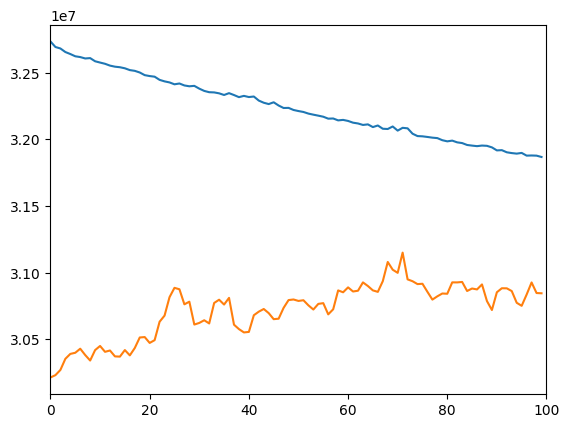

In [91]:
plt.plot(history.history['loss'])
plt.xlim(0, 100)
plt.plot(history.history['val_loss'])


In [ ]:
# prompt: make the plot of loss with x axis upto 100

plt.plot(history.history['loss'])
plt.xlim(0, 100)
plt.plot(history.history['val_loss'])
